import os
import shutil
from sklearn.model_selection import train_test_split

# Define classes (date fruits)
classes = ['Ajwa', 'Mabroom', 'Sukkary']

# Path to your dataset
dataset_path = r'C:\Users\FzoOT\OneDrive\Desktop\Tuwaiq\DateFruitClassification\TU-DG_date_grading_dataset\Dataset'

# Create folders for training, validation, and test sets
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    grades = os.listdir(class_path)
    
    for grade in grades:
        grade_path = os.path.join(class_path, grade)
        images = os.listdir(grade_path)
        
        if len(images) < 2:
            print(f"Not enough samples in {cls}_{grade} to split.")
            continue
        
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        
        if len(test_images) < 2:
            print(f"Not enough samples in test set for {cls}_{grade}. Skipping.")
            continue
        
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
        
        # Move images to respective folders and label them
        for img in train_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(train_dir, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)
        
        for img in val_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(val_dir, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)
        
        for img in test_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(test_dir, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)


import os
import shutil
from sklearn.model_selection import train_test_split

# Define classes (date fruits)
classes = ['Ajwa', 'Mabroom', 'Sukkary']

# Path to your dataset
dataset_path = r'C:\Users\FzoOT\OneDrive\Desktop\Tuwaiq\DateFruitClassification\TU-DG_date_grading_dataset\Dataset'

# Create folders for training, validation, and test sets
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    grades = os.listdir(class_path)
    
    # Create subdirectories for each class within train, validation, and test folders
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    for grade in grades:
        grade_path = os.path.join(class_path, grade)
        images = os.listdir(grade_path)
        
        if len(images) < 2:
            print(f"Not enough samples in {cls}_{grade} to split.")
            continue
        
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        
        if len(test_images) < 2:
            print(f"Not enough samples in test set for {cls}_{grade}. Skipping.")
            continue
        
        val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
        
        # Move images to respective folders and label them
        for img in train_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(train_dir, cls, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)
        
        for img in val_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(val_dir, cls, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)
        
        for img in test_images:
            src = os.path.join(grade_path, img)
            dst = os.path.join(test_dir, cls, f'{cls}_{grade}_{img}')
            shutil.copy(src, dst)


In [12]:
import os
import random
import shutil
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split

# Define classes (date fruits)
classes = ['Ajwa', 'Mabroom', 'Sukkary']

# Path to your dataset
dataset_path = r'C:\Users\FzoOT\Downloads\DateFruitClassification\DateFruitClassification\TU-DG_date_grading_dataset\Dataset'

# Function to load images as arrays
def load_images_as_arrays(image_paths):
    image_arrays = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize((256, 256))  # Resize the image if needed
        img_array = np.array(img)
        image_arrays.append(img_array)
    return np.array(image_arrays)

# Create folders for training, validation, and test sets
train_dir = 'train'
val_dir = 'validation'
test_dir = 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lists to store image arrays and corresponding labels
train_images = []
val_images = []
test_images = []

train_labels = []
val_labels = []
test_labels = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    grades = os.listdir(class_path)
    
    for grade in grades:
        grade_path = os.path.join(class_path, grade)
        images = [os.path.join(grade_path, img) for img in os.listdir(grade_path)]
        
        if len(images) < 2:
            print(f"Not enough samples in {cls}_{grade} to split.")
            continue
        
        train, test_val = train_test_split(images, test_size=0.2, random_state=42)
        test, val = train_test_split(test_val, test_size=0.5, random_state=42)
        
        train_images.extend(train)
        val_images.extend(val)
        test_images.extend(test)
        
        train_labels.extend([cls] * len(train))
        val_labels.extend([cls] * len(val))
        test_labels.extend([cls] * len(test))

# Shuffle the images and labels together
random.seed(42)
train_combined = list(zip(train_images, train_labels))
random.shuffle(train_combined)
train_images[:], train_labels[:] = zip(*train_combined)

val_combined = list(zip(val_images, val_labels))
random.shuffle(val_combined)
val_images[:], val_labels[:] = zip(*val_combined)

test_combined = list(zip(test_images, test_labels))
random.shuffle(test_combined)
test_images[:], test_labels[:] = zip(*test_combined)

# Load images into arrays
train_data = load_images_as_arrays(train_images)
val_data = load_images_as_arrays(val_images)
test_data = load_images_as_arrays(test_images)

# Display shapes of the loaded data
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

print("Train labels:", train_labels[:10])  # Displaying the first 10 labels for illustration
print("Validation labels:", val_labels[:10])
print("Test labels:", test_labels[:10])


Train data shape: (2704, 256, 256, 3)
Validation data shape: (341, 256, 256, 3)
Test data shape: (338, 256, 256, 3)
Train labels: ['Sukkary', 'Ajwa', 'Mabroom', 'Ajwa', 'Ajwa', 'Ajwa', 'Mabroom', 'Mabroom', 'Mabroom', 'Mabroom']
Validation labels: ['Ajwa', 'Sukkary', 'Ajwa', 'Ajwa', 'Ajwa', 'Ajwa', 'Mabroom', 'Ajwa', 'Ajwa', 'Sukkary']
Test labels: ['Ajwa', 'Sukkary', 'Ajwa', 'Mabroom', 'Mabroom', 'Ajwa', 'Ajwa', 'Mabroom', 'Ajwa', 'Ajwa']


In [13]:
%store train_data
%store test_data
%store val_data
%store train_labels
%store test_labels
%store val_labels

Stored 'train_data' (ndarray)
Stored 'test_data' (ndarray)
Stored 'val_data' (ndarray)
Stored 'train_labels' (list)
Stored 'test_labels' (list)
Stored 'val_labels' (list)


In [14]:
np.unique(val_labels)

array(['Ajwa', 'Mabroom', 'Sukkary'], dtype='<U7')

Text(0.5, 1.0, 'Sukkary')

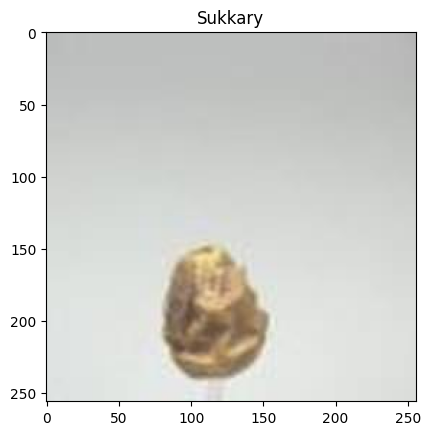

In [15]:
from matplotlib import pyplot as plt


plt.imshow(train_data[-1])
plt.title(train_labels[-1])